<h1>Algerian Forest Fires Dataset</h1>

Project Name : - Algerian Forest Fire Dataset EDA , FE &Temperature Prediction using Linear Regression,Ridge,Lasso,Elastic Net¶
Problem statement . This dataset comprises of Algerian Forest Fire Dataset taken from UCI .

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
forest=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=0)

<h3>Basic Information About the Dataset: Size, Shape</h3>

In [4]:
forest.shape  #Dataset has 247 rows and 14 columns

(247, 14)

In [5]:
forest.info()  # dataset has all object data types which needs to be fixed and corrected data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


<h3> Performing EDA - Data Cleaning</h3>

In [6]:
forest.head()  # checking top rows data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
forest.isnull().sum()  

# checking null values in dataset
# we see that their are very less null values and also mostly the count is 2.

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [8]:
forest[forest.isnull().any(axis=1)] # here we check which index no. has null values 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
forest=forest.drop([122,123,168],axis=0)  # we remove all those rows which has null valuess

In [10]:
forest.isnull().sum()  # now there are zero null values.

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [11]:
forest.columns  #now let see our columns and we see that there are blank spaces in column names

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [12]:
forest.columns=forest.columns.str.strip()  #we remove all the blank spaces in all column names

In [13]:
forest.columns  #as we can see all blank spaces removed from column names

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [14]:
forest.head(20)  # checking 20 records of our dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [15]:
forest['Classes'].unique()  # starting from Classes, we can see there are multiple dublicates of "not fire" and "fire" word

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [16]:
forest.groupby(['Classes'])['Classes'].count() #we can see the count of each "not fire", "fire" and its dublicates

Classes
Classes            1
fire               4
fire               2
fire             131
not fire           2
not fire           1
not fire         101
not fire           1
not fire           1
Name: Classes, dtype: int64

In [17]:
forest.Classes=forest.Classes.str.strip()  # we removed white/blank spaces from every "fire" and "not fire" which solves our dulicate value problem.

In [18]:
forest.groupby(['Classes'])['Classes'].count() 

#we there is only "fire" and "not fire" left which is correct. BUT why we are seeing Classes as a RECORD? Lets find out.

Classes
Classes       1
fire        137
not fire    106
Name: Classes, dtype: int64

In [19]:
forest[forest['Classes']=='Classes'].index[0] # we can see that index number 124 has "Classes" as a Record.

124

In [20]:
forest[forest['Classes']=='Classes']

#when We check the full record of 124th Index number . It has Column name as values which make it dublicate in our dataset.
#May be this is why our dataset has Object data types in all the columns because this 1 record is string type which convert whole column as objects.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [21]:
forest = forest.drop(124).reset_index(drop=True)

#lets drop the index number 124 & reset the indexing and also drop the extra indexing we have.

In [22]:
forest

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [23]:
forest.groupby(['Classes'])['Classes'].count() 

#now the data is clean which we can see from our 1 Column "Classes" and now we will check all columns.

Classes
fire        137
not fire    106
Name: Classes, dtype: int64

<h3>lets check every column for any discrepancies </h3>

In [24]:
forest['day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [25]:
forest['month'].unique()

array(['6', '7', '8', '9'], dtype=object)

In [26]:
forest['year'].unique()

array(['2012'], dtype=object)

In [27]:
forest['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [28]:
forest['RH'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [29]:
forest['Ws'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', '10', '9', '8', '6', '29'], dtype=object)

In [30]:
forest['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [31]:
forest['FFMC'].unique()

array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
       '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
       '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
       '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
       '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
       '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
       '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
       '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
       '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
       '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
       '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
       '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
       '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
       '66.8', '62.2', '65.5', '64.6', '60.2', '86.2', '78.3', '74.

In [32]:
forest['DMC'].unique()

array(['3.4', '4.1', '2.5', '1.3', '3', '5.8', '9.9', '12.1', '7.9',
       '9.5', '12.5', '13.8', '6.7', '4.6', '1.7', '1.1', '1.9', '4.5',
       '6.3', '7', '8.2', '11.2', '14.2', '17.8', '21.6', '25.5', '18.4',
       '22.9', '2.4', '2.6', '7.6', '10.9', '9.7', '7.7', '6', '8.1',
       '7.8', '5.2', '9.4', '12', '12.3', '18.5', '16.4', '10.5', '9.6',
       '17.1', '22.2', '24.4', '26.7', '28.5', '31.9', '4.8', '5.7',
       '11.1', '13', '15.5', '11.3', '14.8', '18.6', '21.7', '15.6', '19',
       '11.7', '16', '20', '23.2', '25.9', '29.6', '33.5', '37.6', '40.5',
       '43.9', '45.6', '47', '50.2', '54.2', '25.2', '8.7', '0.7', '1.2',
       '3.6', '3.2', '2.1', '2.2', '0.9', '6.4', '9.8', '13.5', '16.5',
       '10.6', '5.5', '8.3', '7.1', '2.9', '2.7', '8.4', '8.5', '13.3',
       '18.2', '21.3', '11.4', '7.2', '4.2', '3.9', '4.4', '3.8', '10',
       '12.8', '20.9', '27.2', '17.9', '13.6', '18.7', '8', '12.6', '18',
       '19.4', '21.1', '23.9', '27.8', '32.7', '39.6', '44.

In [33]:
forest['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [34]:
forest['ISI'].unique()

array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
       '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
       '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
       '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
       '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
       '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
       '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
       '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
       '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
       '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
       '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
       '14.2', '11.2'], dtype=object)

In [35]:
forest['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '14.1', '9.1', '13', '17.3', '30',
       '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4', '15.2',
  

In [36]:
forest['BUI'].unique()

array(['3.4', '3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6',
       '15.8', '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3',
       '5.1', '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8',
       '29.7', '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1',
       '15.4', '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1',
       '14.2', '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9',
       '29.4', '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2',
       '14.1', '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22',
       '17.6', '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5',
       '50.9', '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1',
       '5.6', '2.6', '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2',
       '12.9', '9.6', '6.2', '9', '6.8', '6.5', '9.3', '10.7', '7.3',
       '13.1', '18', '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7',
       '16.4', '20.8', '27.1', '17.8', '3.3', '7.8', '10.3', '18.7',
      

In [37]:
#now that we can see all columns data is cleaned. 

In [38]:
#lets change the datatype which are incorrect because of dublicate column name values in records.

In [39]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.7+ KB


In [40]:
forest.head(5) 

#we can see that day, month, year,temperature,RH,WS should be integer type and Rain,FFMC,DMC,DC,ISI,BUI,FWI are float type and Classes column is String type

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [41]:
convert2int=['day', 'month', 'year', 'Temperature', 'RH', 'Ws']

forest[convert2int] = forest[convert2int].astype(int)

# converting data types of day, month, year,temperature,RH,WS columns to integer data type.

In [42]:
var=[var for var in forest.columns if forest[var].dtype=="O"]

for i in var:
    if i!="Classes":
        forest[i]=forest[i].astype(float)

#Converting Rain,FFMC,DMC,DC,ISI,BUI,FWI are float type expect for Classes column which should be object type.

In [43]:
forest.info() # all columns corrected with their actual data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


<h3>PERFORMING Feature engineering to save memory.
 we can use 1 for "fire" and 0 for "not fire" in Classes column which saves our memory and it helps to create data modelling. It can simply data representation and is beneficial for machine learning algorithms that wants numerial values as input.</h3>

In [44]:
forest['Classes'] = forest['Classes'].map({'fire': 1, 'not fire': 0}) 

# chaning values from 'fire' to 1 and 'not fire' to 0
# Approach 2 : creating new column : forest['Encoded_Classes'] = (forest['Classes'] == 'fire').astype(int) 
# Approach 2: Explaination : we applied a condition where if we find 'fire' that means result should be TRUE (which converts to integer value as 1)
#  and False as 0. 

In [45]:
forest.tail(10)  # now can see that we have succesfully mapped values for 'fire' to 1 and 'not fire' to 0

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
233,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1
234,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1
235,23,9,2012,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1
236,24,9,2012,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0
237,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


<h3>Dataset has 2 regions which is divied like this: <br> Region 1: Bejaia, 
Region 2: Sidi Bel Abbes , <br>
First Region has 122rowsd and secon regiond has 122rowss : total 244 rows(records of data .<br>)
We deleted 2 null valuedowsds whi h le usft with 2 records as you can see above. 
<br>
    now we will divide the data of both region by 121 + 121 = 242.4bbes</h3>

In [46]:
Bejaia=forest.iloc[0:121,:]  # We have taken out first 121 rows from our Forest dataset.

In [47]:
Bejaia  # Region 1 : Bejaia region

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,25,9,2012,26,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,0
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0


In [48]:
sidi=forest.iloc[121:242,:].reset_index(drop=True) # We have taken out 121 rows that are left from our Forest dataset.

In [49]:
sidi # Region 2 :Sidi-Bel-Abbes region

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0
1,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
2,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
3,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
4,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0


<h2>Visualization/ Graphs/ Charts</h2>

In [50]:
forest.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


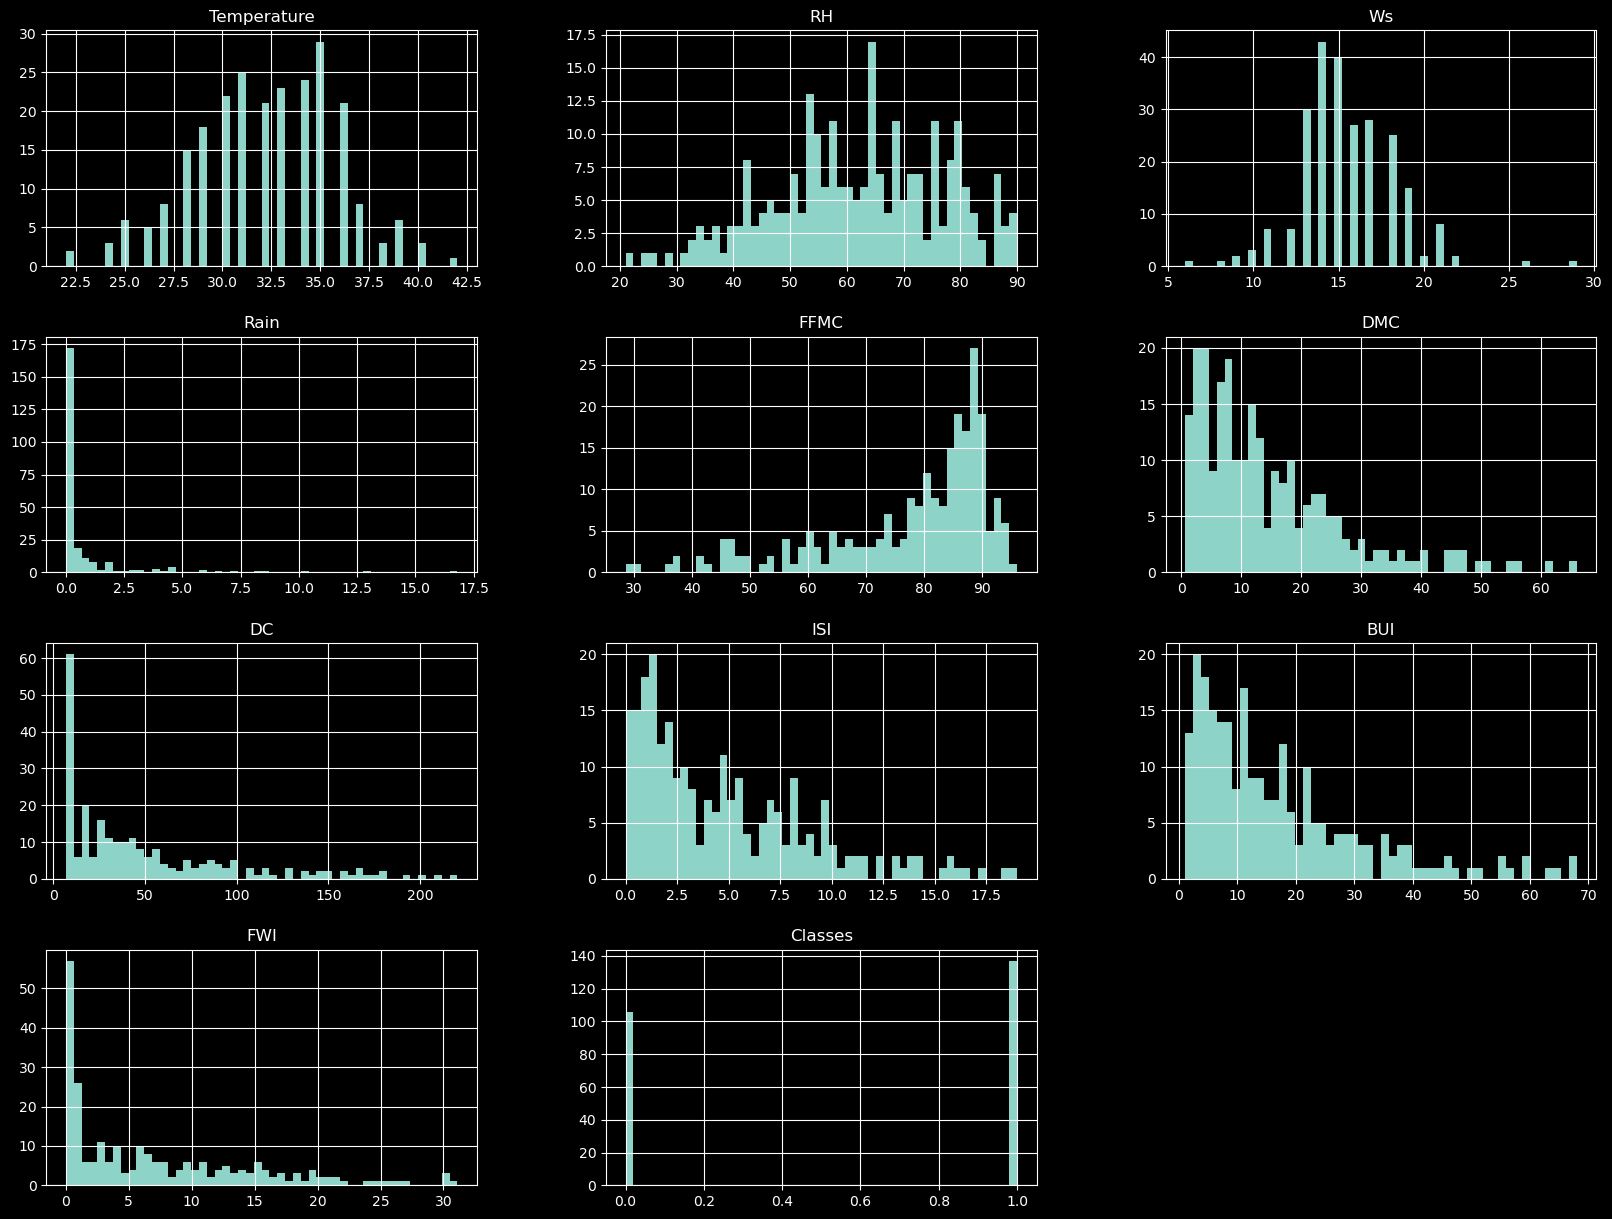

In [51]:
# plot density plot for all features
forest2=forest.iloc[:,3:]

plt.style.use('dark_background')
forest2.hist(bins=50,figsize=(20,15))
plt.show()

In [52]:
#percentgae for pie chart
percentage = forest['Classes'].value_counts(normalize=True)*100

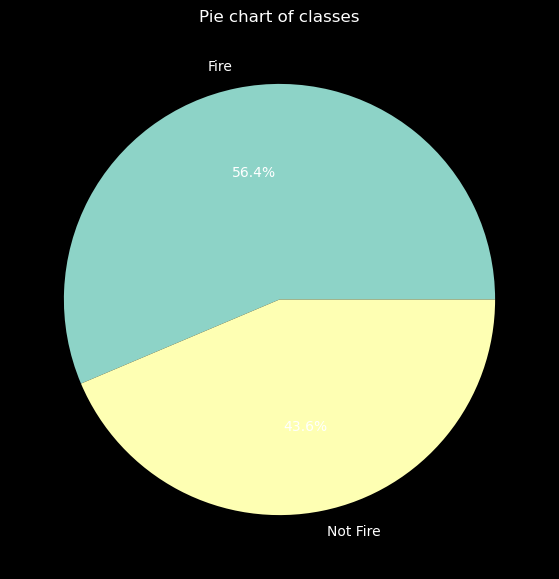

In [53]:
#plotting piechart

labels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of classes')
plt.show()

In [54]:
#correlation between each feature
forest2.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


<Axes: >

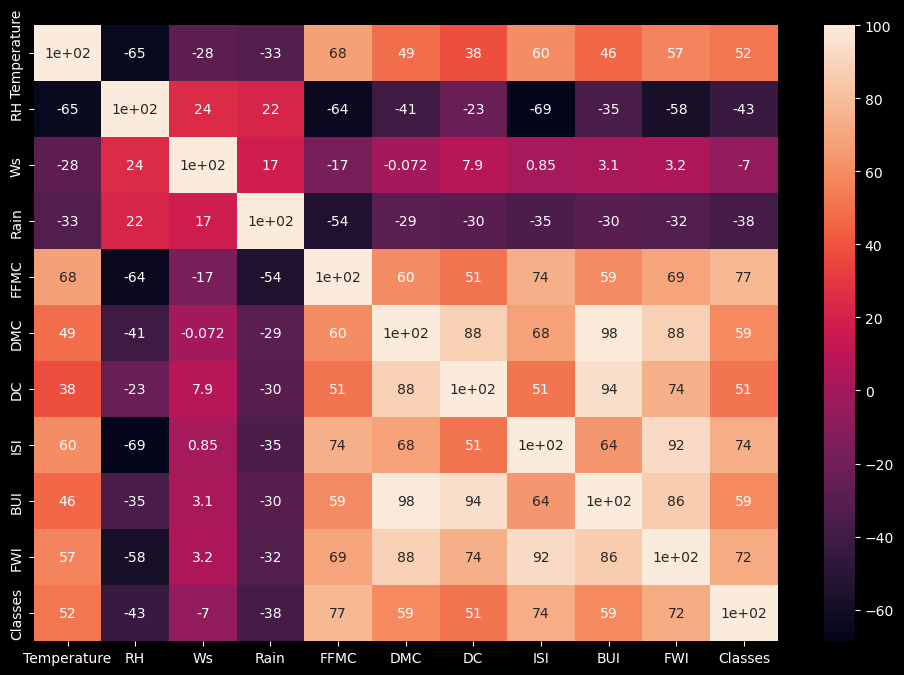

In [55]:
#heatmap for correlation


plt.figure(figsize=(12, 8))

sns.heatmap(forest2.corr()*100,annot=True)

In [56]:
forest2

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


<Axes: >

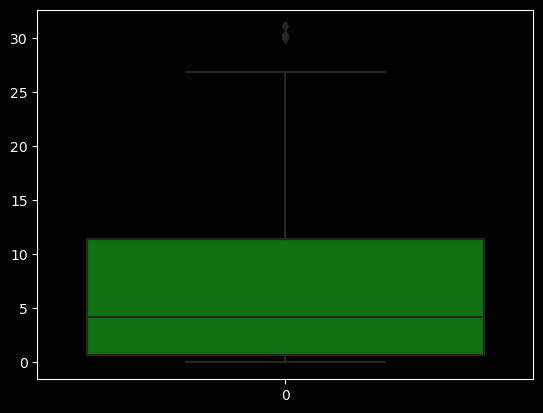

In [57]:
#Box Plots
sns.boxplot(forest['FWI'],color='green')

In [58]:
forest.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

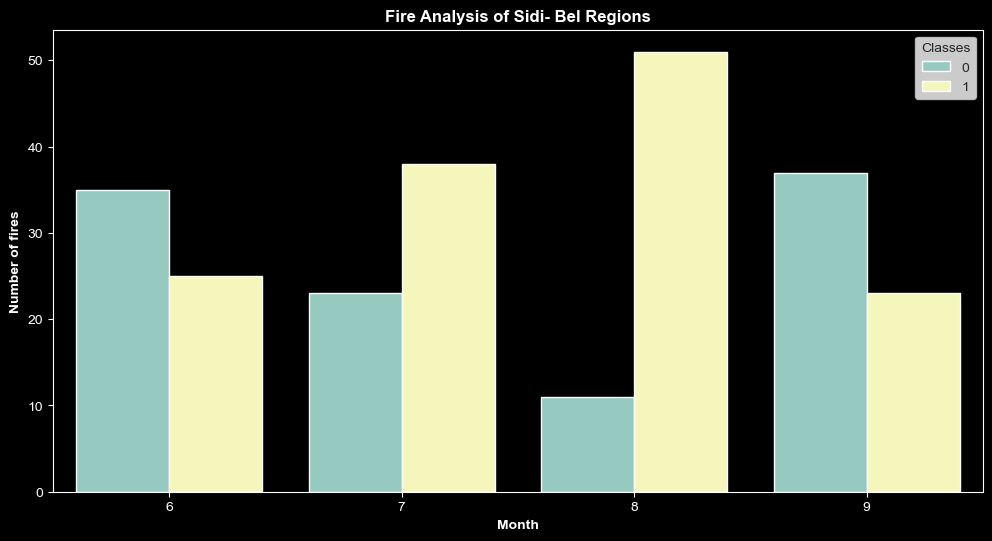

In [59]:
forr=forest.loc[forest['Classes']==1]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=forest)
plt.ylabel("Number of fires",weight="bold")
plt.xlabel("Month",weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions", weight="bold")






Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

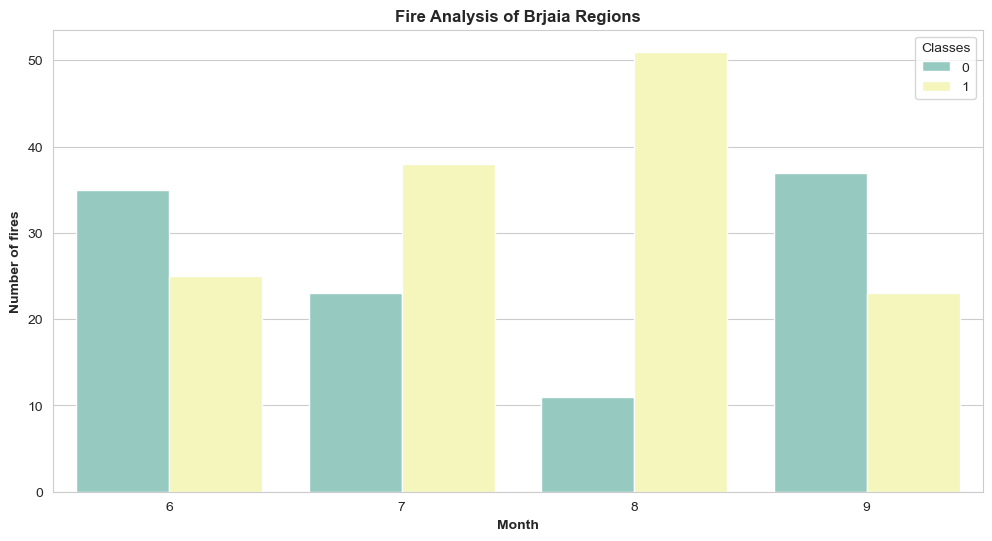

In [60]:
forre=forest.loc[forest['Classes']==0]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=forest)
plt.ylabel("Number of fires",weight="bold")
plt.xlabel("Month",weight='bold')
plt.title("Fire Analysis of Brjaia Regions", weight="bold")






<p>It is Observed that August and September had the most number of forest fires for both regions. And From the above plot of months, we can understand few things:

Most of the fires happend in August and very high Fires happened in only 3 months - June, July and August.

Less fires was on September</p>

In [61]:
forest2

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [62]:
y=forest2['FWI']

In [63]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [64]:
x=forest2.drop("FWI",axis=1)

In [65]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [68]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0
...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1


In [69]:
y_train

97      0.9
141     0.3
192    21.6
68      2.6
119     0.9
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 182, dtype: float64

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to hold the correlated column names
    corr_dataset = dataset.corr()  # Assuming 'dataset' is a DataFrame containing numeric data

    for i in range(len(corr_dataset.columns)):
        for j in range(i):
            if abs(corr_dataset.iloc[i, j]) > threshold:
                colname = corr_dataset.columns[i]
                col_corr.add(colname)

    return col_corr


In [72]:
corr_features = correlation(x_train,0.85)

In [73]:
corr_features

{'BUI', 'DC'}

In [74]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [75]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
97,29,74,19,0.1,75.8,3.6,2.1,0
141,31,72,14,0.2,60.2,3.8,0.8,0
192,40,31,15,0.0,94.2,22.5,16.6,1
68,32,60,18,0.3,77.1,11.3,2.2,0
119,32,47,14,0.7,77.5,7.1,1.8,0
...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0
14,28,80,17,3.1,49.4,3.0,0.4,0
92,25,76,17,7.2,46.0,1.3,0.2,0
179,34,59,16,0.0,88.1,19.5,7.4,1


In [76]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
24,31,64,15,0.0,86.7,14.2,5.7,1
6,33,54,13,0.0,88.2,9.9,6.4,1
152,28,58,18,2.2,63.7,3.2,1.2,0
232,34,58,13,0.2,79.5,18.7,2.1,0
238,30,65,14,0.0,85.4,16.0,4.5,1
...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0
178,33,57,16,0.0,87.5,15.7,6.7,1
224,31,72,14,0.0,84.2,8.3,3.8,1
230,36,33,13,0.1,90.6,25.8,9.0,1


<h2>Feature scallling

Standardization - standard scaling
Normalization
min_max scaling
robust scaling
aboslute max scaling</h2>

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
x_train_scaled=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_157436\3278231835.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x-Train After Scaling')

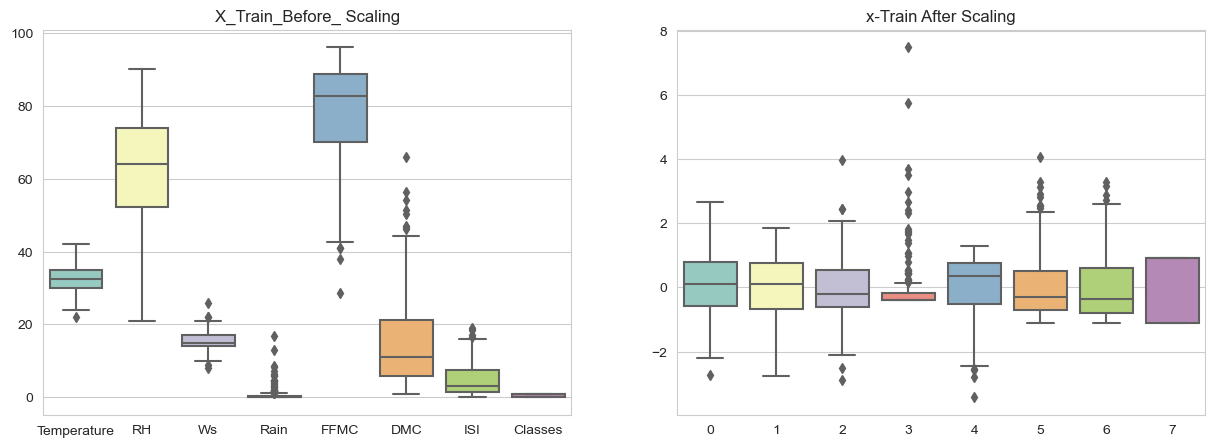

In [80]:
#Box plots to understand the Effect of Scaling


plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("X_Train_Before_ Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x-Train After Scaling")

# Building Linear Regression Model

In [81]:
#regreesion model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [82]:
reg=LinearRegression()

In [83]:
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [84]:
x_pred=reg.predict(x_test)

In [85]:
x_pred

array([ 7.84622919,  7.25845206,  0.15585753,  4.67422523,  7.07746244,
        1.68575679,  2.59310093,  7.92618894,  1.4126031 ,  2.9327609 ,
        0.30951404, 10.02321539,  9.5653749 , 17.31515567, 18.08152032,
        1.54962029,  1.8479598 , -0.20879424,  6.90222983,  3.34133462,
        1.28955924,  0.05116285,  6.08509644,  0.10045751, 21.19037042,
        5.37497373,  5.55470895,  9.43928271, -0.42665995, 10.25203371,
        6.51179723, -0.20618148, 10.08159585, 14.22505683,  1.07731683,
        0.8193943 ,  1.82395415,  6.30881168,  0.16647158,  0.65911157,
        6.21628803,  1.26041577,  8.0276992 , -0.36654346, 15.57203551,
        8.02566788,  8.86573271,  1.06993932, 13.3280303 ,  0.95907645,
       29.52676263,  5.77816809, 17.58027928, 18.99213906, 13.46271664,
       15.94067285,  0.98776613,  9.39053958,  4.11384709, 14.67162951,
        5.60664874])

In [86]:
r2_score(x_pred,y_test)

0.9807687048930382

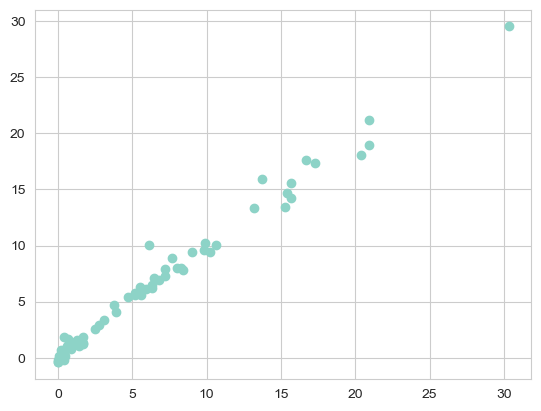

In [87]:
plt.scatter(y_test,x_pred)

In [88]:
#Lasso Regression 

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("R2 Score",score)   #feature selection specialist 



R2 Score 0.9492020263112388


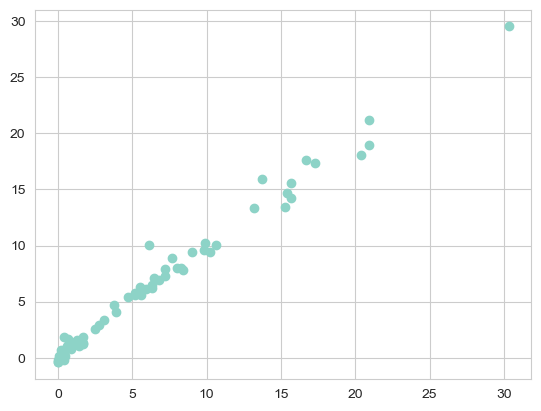

In [89]:
plt.scatter(y_test,x_pred)

# Ridge Regression
Ridge Regression (also called as L2 Regularization),the main aim of ridge regression is to reduce overfitting

In [90]:
#Ridge Regression overfir regression specalist

#Lasso Regression 

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("R2 Score",score)



R2 Score 0.9813046839382391


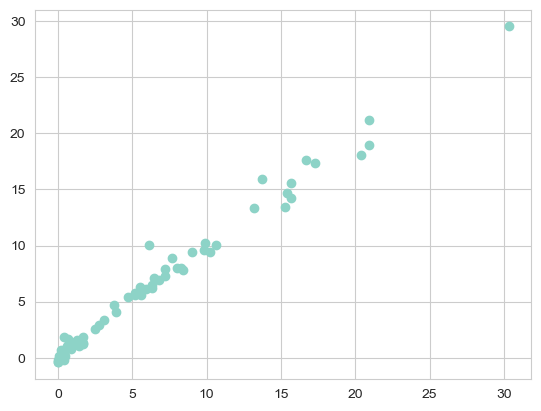

In [91]:
plt.scatter(y_test,x_pred)

In this project, exploration, feature engineering, and regression techniques were applied to the Algerian Forest Fire Dataset from UCI. Insights gained through EDA informed predictive models for temperature forecasting using Linear Regression, Ridge, Lasso, and Elastic Net. Challenges included data quality issues and model complexity, urging continuous refinement for improved accuracy.

In conclusion, the final report presents a comprehensive analysis of the Algerian Forest Fire Dataset, encompassing data from two regions: Brjajia and Sidi Bel-abbes. With 244 instances, 11 attributes, and 1 output attribute (Temperature), spanning June to September 2012, the study sheds light on critical factors influencing forest fire occurrences in Algeria. This analysis provides a foundation for understanding and predicting forest fire risks in the region.